###### Dataset

In this homework, we will use the California Housing Prices data from Kaggle.

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

In [178]:
# import python libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [179]:
# set the download url in a variable and download
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [180]:
# download the dateset
!wget $data -O house_prices.csv

--2022-09-22 14:18:45--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘house_prices.csv’

house_prices.csv    100%[===================>]   1.36M  41.9KB/s    in 32s     

2022-09-22 14:19:18 (43.1 KB/s) - ‘house_prices.csv’ saved [1423529/1423529]



In [181]:
# read dataset
df = pd.read_csv('house_prices.csv')

In [182]:
# check length of dataset
len(df)

20640

In [183]:
# transpose table to see column names
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


###### Features

In [184]:
# columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

###### Data Preparation

In [185]:
# fSelect only the features from above and fill in the missing values with 0.
df = df.fillna(0)

In [186]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = (df['total_rooms'] / df['households']).round()

In [187]:
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms']).round()

In [188]:
# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = (df['population'] / df['households']).round()

###### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [189]:
# the most sort after ocean proximity
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

###### Split the data

In [190]:
# import sklearn train test split library
from sklearn.model_selection import train_test_split

In [191]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(df, test_size = .2, random_state = 1)

In [192]:
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
df_train, df_val = train_test_split(df_train_full, test_size = .33, random_state = 42)

In [193]:
# set the target to variables
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values

In [194]:
# Make sure that the target value (median_house_value) is not in your dataframe.
del df_train['median_house_value']
del df_val['median_house_value']

###### Question 2
 * Create the correlation matrix for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
  * What are the two features that have the biggest correlation in this dataset?

In [195]:
# determine the correlation between numerical values and median value price
df_train_full.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925246,-0.106156,0.037578,0.063881,0.095861,0.049854,-0.018227,-0.050893,-0.026160,0.021263,0.000168
latitude,-0.925246,1.000000,0.009373,-0.029916,-0.061459,-0.105325,-0.066939,-0.076734,-0.139374,0.106089,-0.026754,0.005328
housing_median_age,-0.106156,0.009373,1.000000,-0.361784,-0.316600,-0.296996,-0.301496,-0.123550,0.105758,-0.145852,0.031215,0.014510
total_rooms,0.037578,-0.029916,-0.361784,1.000000,0.918916,0.854458,0.916737,0.201318,0.135514,0.127013,-0.043764,-0.025205
total_bedrooms,0.063881,-0.061459,-0.316600,0.918916,1.000000,0.863723,0.965374,-0.006463,0.049703,0.002685,0.002896,-0.028447
population,0.095861,-0.105325,-0.296996,0.854458,0.863723,1.000000,0.905040,0.007521,-0.023884,-0.074465,-0.000382,0.075281
households,0.049854,-0.066939,-0.301496,0.916737,0.965374,0.905040,1.000000,0.013801,0.066801,-0.083051,0.000419,-0.027990
median_income,-0.018227,-0.076734,-0.123550,0.201318,-0.006463,0.007521,0.013801,1.000000,0.688194,0.308099,-0.065533,0.022775
median_house_value,-0.050893,-0.139374,0.105758,0.135514,0.049703,-0.023884,0.066801,0.688194,1.000000,0.145732,-0.000116,-0.021638
rooms_per_household,-0.026160,0.106089,-0.145852,0.127013,0.002685,-0.074465,-0.083051,0.308099,0.145732,1.000000,-0.076071,-0.005106


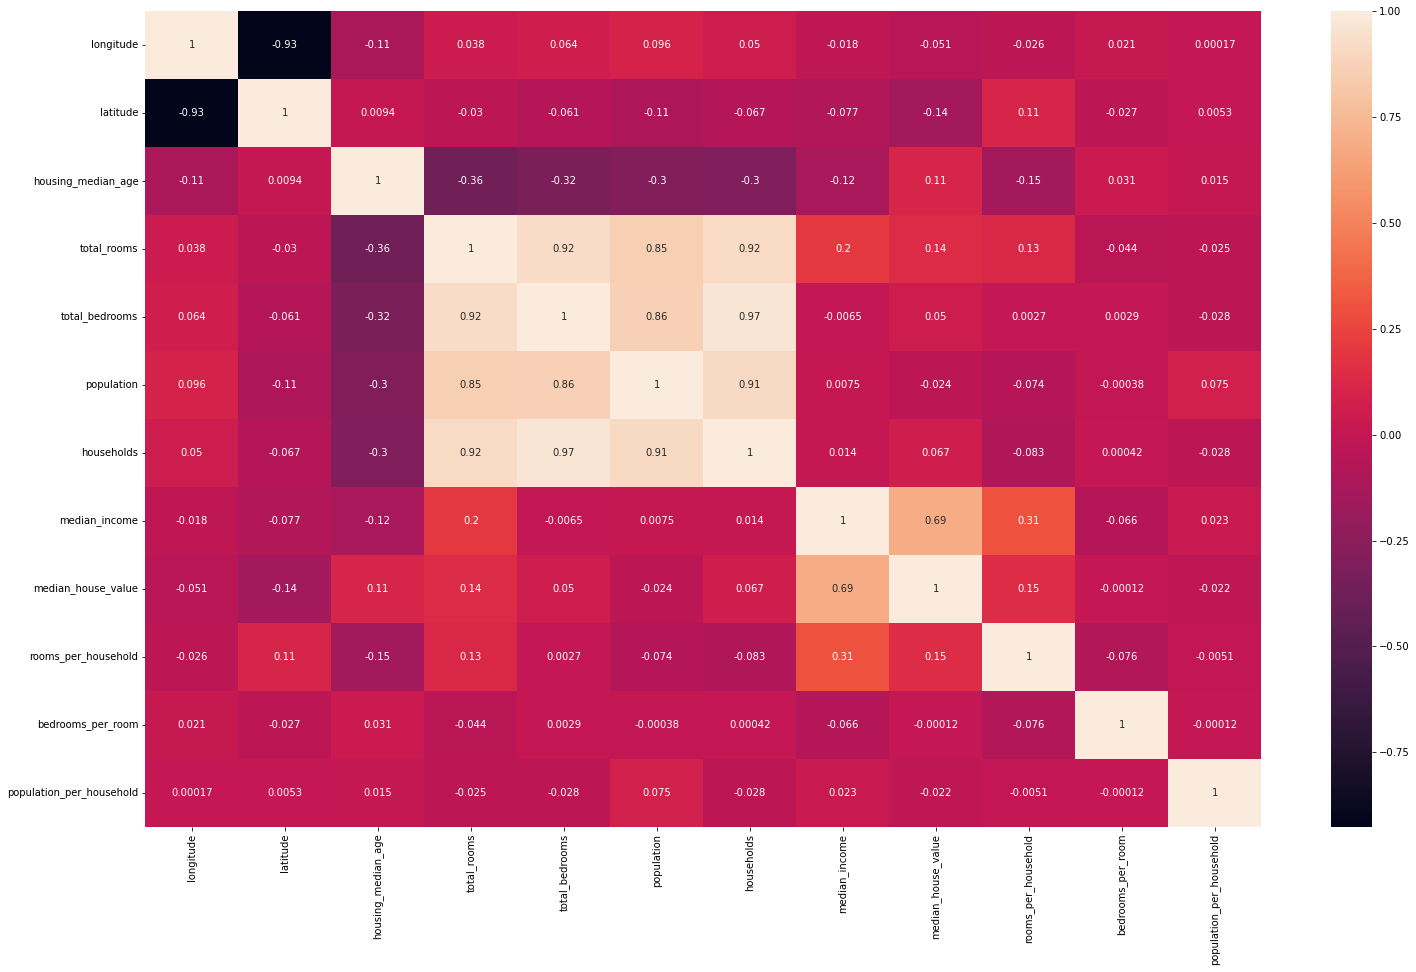

In [196]:
# correlation matrix plot
plt.rcParams['figure.figsize'] = (25.0, 15.0)
sns.heatmap(df_train_full.corr(), annot=True);

###### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.

In [197]:
# Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.
df_train['above_average'] = (df_train_full.median_house_value > df_train_full.median_house_value.mean())

###### Question 3

In [198]:
# import mutual infor score library
from sklearn.metrics import mutual_info_score

In [199]:
# Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.


In [200]:
# What is the value of mutual information? Round it to 2 decimal digits using round(score, 2)


In [203]:
df_mi = df_train.apply(lambda x: mutual_info_score(x, df_train.above_average))

df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')

display(df_mi.head())
display(df_mi.head())

ValueError: labels_true must be 1D: shape is ()